# Computational biology with python

## 1 Central Dogma (ODE) model

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [34]:
y0 = [0,0]
t =  np.linspace(0, 200, num = 100) # from 0 to 200, sampling 100 times

k_1 = 0.5
gamma_1 = 0.1
k_2 = 1
gamma_2 = 0.05 
n = 4
c = 1

params = [k_1, gamma_1, k_2, gamma_2]

In [35]:
def sim(variable, t, params):
    G1 = variable[0]
    G2 = variable[1]

    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    
    dG1dt = k_1 - gamma_1 * G1
    dG2dt = k_2 - gamma_2 * G2

    return([dG1dt, dG2dt])

In [36]:
y = odeint(sim, y0, t, args=(params,))

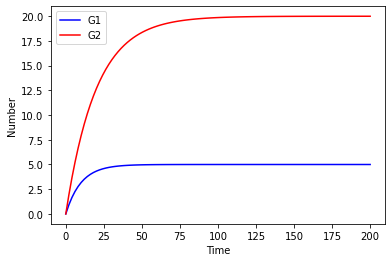

In [37]:
f, ax = plt.subplots(1)

line1, = ax.plot(t, y[:,0], color = "b", label="G1")
line2, = ax.plot(t, y[:,1], color = "r", label="G2")

ax.set_ylabel("Number")
ax.set_xlabel("Time")

ax.legend(handles=[line1,line2])
plt.show()

## 2 Activation Hill Function

Gene 1's product G1 inhibits the production of gene 2 (G2)

$$\dfrac{G_1}{dt}=k_1 - \gamma_1 G_1$$

- $G_1$ represents the concentration of G1
- $k_1$ : production rate of G1
- $\gamma_2$ : degradation rate of G2

$$\dfrac{G_2}{dt}=[\dfrac{G_1^n}{c^n+G_1^n}]k_2-\gamma_2 G_2$$

- $k_2$ : maximum production rate of G2
- The higher G1 is , the faster the G2 is 


In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [2]:
y0 = [0,0]
t =  np.linspace(0, 200, num = 100) # from 0 to 200, sampling 100 times

k_1 = 0.5
gamma_1 = 0.1
k_2 = 0.5
gamma_2 = 0.05 
n = 4
c = 1

params = [k_1, gamma_1, k_2, gamma_2, n ,c ]

In [3]:
def sim(variable, t, params):
    G1 = variable[0]
    G2 = variable[1]

    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    n = params[4]
    c = params[5]
    
    dG1dt = k_1 - gamma_1 * G1
    dG2dt = (G1**n / (c**n + G1**n)) * k_2 - gamma_2 *G2

    return([dG1dt, dG2dt])

In [4]:
y = odeint(sim, y0, t, args=(params,))

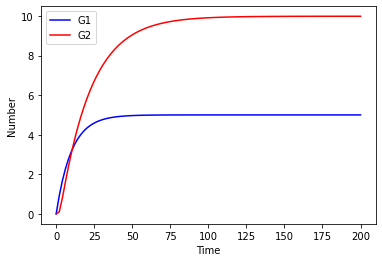

In [5]:
f, ax = plt.subplots(1)

line1, = ax.plot(t, y[:,0], color = "b", label="G1")
line2, = ax.plot(t, y[:,1], color = "r", label="G2")

ax.set_ylabel("Number")
ax.set_xlabel("Time")

ax.legend(handles=[line1,line2])
plt.show()

The production of G2 is sped up due the increase of G1 production

## 3 Repression Hill Function

Gene 1's product G1 inhibits the production of gene 2 (G2)

$$\dfrac{G_1}{dt}=k_1 - \gamma_1 G_1$$

- $G_1$ represents the concentration of G1
- $k_1$ : production rate of G1
- $\gamma_2$ : degradation rate of G2

$$\dfrac{G_2}{dt}=[\dfrac{c^n}{c^n+G_1^n}]k_2-\gamma_2 G_2$$

- $k_2$ : maximum production rate of G2
- $\gamma_2$ : degradation rate of G2
- The higher G1 is, the smaller the equation, approach to zero


In [6]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [7]:
y0 = [0,0] # y0 is used to save the G1 and G2, initialize to 0 for both products
t = np.linspace(0, 200, num = 100) # from 0 to 200, sampling 100 times

k_1 = 0.5
gamma_1 = 0.1
k_2 = 0.5
gamma_2 = 0.05 
n = 4
c = 1

params = [k_1, gamma_1, k_2, gamma_2, n ,c ]

In [8]:
def sim(variable, t, params):
    G1 = variable[0]
    G2 = variable[1]

    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    n = params[4]
    c = params[5]
    
    dG1dt = k_1 - gamma_1 * G1
    dG2dt = (c**n / (c**n + G1**n)) * k_2 - gamma_2 *G2

    return([dG1dt, dG2dt])

In [9]:
y = odeint(sim,y0,t, args=(params,))

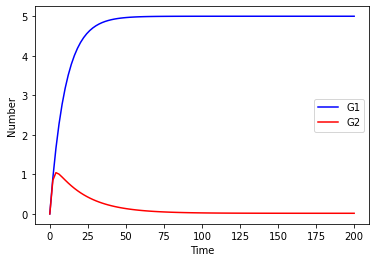

In [10]:
f, ax = plt.subplots(1)

line1, = ax.plot(t, y[:,0], color = "b", label="G1")
line2, = ax.plot(t, y[:,1], color = "r", label="G2")

ax.set_ylabel("Number")
ax.set_xlabel("Time")

ax.legend(handles=[line1,line2])
plt.show()

As we get more and more G1, G2's production is inhibited 

## 4 Oscillating Gene Network

Gene Model: negative feedback oscillator

Context: talked two gene model before in activation / repression hill function

Negative feedback loop (cascade) : G1 facilitates the G2, G2 facilitates the G3, G3 inhibits/ represses the G1 production 

$\dfrac{dG_1}{dt}$ is the just the repression hill function of G3 on G1 

$\dfrac{dG_2}{dt}$ and $\dfrac{dG_3}{dt}$ are two activation function of G1 on G2 and G2 on G3, respectively.

In [11]:
y0 = [0,0,0]
t = np.linspace(0, 200, num = 100)

k_1 = 0.5
gamma_1 = 0.1
k_2 = 0.5
gamma_2 = 0.1
k_3 = 0.5
gamma_3 = 0.1
n = 9
c = 1

params = [k_1, gamma_1, k_2, gamma_2, k_3, gamma_3, n, c]

In [12]:
def sim(variables, t, params):

    G1 = variables[0]
    G2 = variables[1]
    G3 = variables[2]

    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    k_3 = params[4]
    gamma_3 = params[5]
    n = params[6]
    c = params[7]

    dG1dt = (c**n / (c**n + G3**n)) * k_1 - gamma_1 * G1
    dG2dt = (G1**n / (c**n + G1**n)) * k_2 - gamma_2 * G2
    dG3dt = (G2**n / (c**n + G2**n)) * k_3 - gamma_3 * G3

    return([dG1dt, dG2dt, dG3dt])  

In [13]:
y = odeint(sim, y0, t, args=(params,))

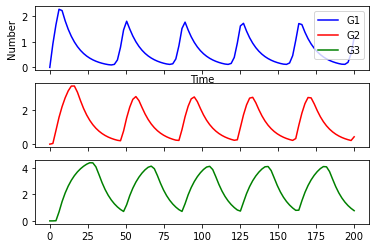

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
# divide the figure into three that shares x and y 

line1, = ax1.plot(t, y[:,0], color = "b", label="G1")
line2, = ax2.plot(t, y[:,1], color = "r", label="G2")
line3, = ax3.plot(t, y[:,2], color = "g", label="G3")

ax1.set_ylabel("Number")
ax1.set_xlabel("Time")

ax1.legend(handles=[line1,line2,line3])
plt.show()

Paper: The good win oscillator by *Brian Goodwin* in 1965

## 5 Deterministic vs. Stochastic Models

### 5.1 Definitions

Deterministic: there is only one trajectory no matter what the initial position is

Stochastic: 
- Definition: Involve randomness based on some random parameters (even the parameters at the beginning is the same, no same trajectory)
- When to apply: when you are interested in the random variation model

### 5.2 Gillespie Algorithm (SSA method)

$t+\tau$ were drawing from an exponential distribution
- `pdf` of an exponential distribution = $\lambda e^{-\lambda x}$
- mean = $\dfrac{1}{\lambda}$
- Why do we use exponential distribution to choose the next random but make sense time point ($t+\tau$)?

How to choose $\lambda$?

- $\lambda = sum(r)$, where $r$ is the rate = $\gamma * x$



Use $\lambda$ to represent the production rate and degradation rate

- p(x -> x+1) = $\dfrac{k}{sum(r)}$
- p(x -> x-1) = $\dfrac{\gamma * x}{sum(r)}$

In [15]:
import numpy as np
import matplotlib 
import matplotlib.pylab as plt
import random

In [21]:
# these two variables will be appended at every time point, such as [0, 1, 2, 3, ....]
X = [0]
t = [0]

tend = 1000

k = 2
gamma = 0.1

while t[-1] < tend:
    
    current_X = X[-1]

    rates = [k, gamma * current_X]
    rate_sum = sum(rates)

    tau = np.random.exponential(scale=1/rate_sum)

    t.append(t[-1] + tau)

    rand = random.uniform(0,1)

    if rand * rate_sum > 0 and rand * rate_sum < rates[0]:
        X.append(X[-1] + 1)
    
    elif rand * rate_sum > rates[0] and rand * rate_sum < rates[0] + rates[1]:
        X.append(X[-1] - 1)


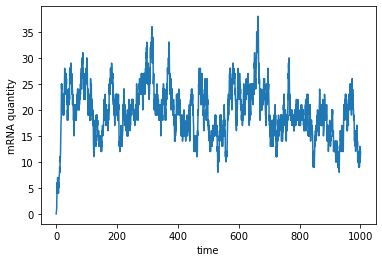

In [22]:
plt.plot(t,X)
plt.xlabel("time")
plt.ylabel("mRNA quantity")
plt.show()

### 5.3 Code for Stochastic Oscillator

Just add them like previous Oscillating network

In [23]:
import numpy as np
import matplotlib 
import matplotlib.pylab as plt
import random

In [32]:
# these two variables will be appended at every time point, such as [0, 1, 2, 3, ....]
X = [0]
Y = [0]
Z = [0]
t = [0]

tend = 1000

k_1 = 4
k_2 = 2
k_3 = 2
gamma_1 = 0.1
gamma_2 = 0.1
gamma_3 = 0.1
n = 9
c = 1

while t[-1] < tend:
    
    current_X = X[-1]
    current_Y = Y[-1]
    current_Z = Z[-1]

    rates = [(c**n / (c**n + current_Z**n)) * k_1, gamma_1 * current_X, \
        (current_X**n / (c**n + current_X**n)) * k_2, gamma_2 * current_Y , \
        (current_Y**n / (c**n + current_Y**n)) * k_3, gamma_3 * current_Z]
    
    rate_sum = sum(rates)

    tau = np.random.exponential(scale=1/rate_sum)

    t.append(t[-1] + tau)

    rand = random.uniform(0,1)

    if rand * rate_sum < rates[0]:
        X.append(X[-1] + 1)
        Y.append(Y[-1])
        Z.append(Z[-1])

    elif rand * rate_sum > rates[0] and rand * rate_sum < sum(rates[:2]):
        X.append(X[-1] - 1)
        Y.append(Y[-1])
        Z.append(Z[-1])

    elif rand * rate_sum > sum(rates[:2]) and rand * rate_sum < sum(rates[:3]):
        X.append(X[-1])
        Y.append(Y[-1] + 1)
        Z.append(Z[-1])

    elif rand * rate_sum > sum(rates[:3]) and rand * rate_sum < sum(rates[:4]):
        X.append(X[-1])
        Y.append(Y[-1] - 1)
        Z.append(Z[-1])

    elif rand * rate_sum > sum(rates[:4]) and rand * rate_sum < sum(rates[:5]):
        X.append(X[-1])
        Y.append(Y[-1])
        Z.append(Z[-1] + 1)

    elif rand * rate_sum > sum(rates[:5]) and rand * rate_sum < sum(rates[:6]):
        X.append(X[-1])
        Y.append(Y[-1])
        Z.append(Z[-1] - 1)


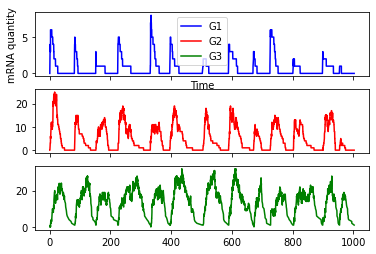

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
# divide the figure into three that shares x and y 

line1, = ax1.plot(t, X, color = "b", label="G1")
line2, = ax2.plot(t, Y, color = "r", label="G2")
line3, = ax3.plot(t, Z, color = "g", label="G3")

ax1.set_ylabel("mRNA quantity")
ax1.set_xlabel("Time")

ax1.legend(handles=[line1,line2,line3])
plt.show()